In [98]:
import numpy as np
import cProfile
import pstats

# Initialize empty arrays for X and Y
X = np.zeros((20, 3))
Y = np.zeros(20, dtype=int)

# Generate 10 samples for class 0 (low x, low y, high z)
for i in range(10):
    x = np.random.uniform(0, 0.4)  # Low x
    y = np.random.uniform(0, 0.4)  # Low y
    z = np.random.uniform(0.6, 1.0)  # High z
    X[i] = [x, y, z]
    Y[i] = 0

# Generate 10 samples for class 1 (low y, high x, high z)
for i in range(10, 20):
    x = np.random.uniform(0.6, 1.0)  # High x
    y = np.random.uniform(0.6, 1.0)  # High y
    z = np.random.uniform(0, 0.4)  # low z
    X[i] = [x, y, z]
    Y[i] = 1

print("X array:")
print(X)
print("\nY array:")
print(Y)


X array:
[[0.2840759  0.15903708 0.98412345]
 [0.23148464 0.17590174 0.97349132]
 [0.3436425  0.10524813 0.88430275]
 [0.03601861 0.22105741 0.65950865]
 [0.30026065 0.26672051 0.98238084]
 [0.06551844 0.34491028 0.81391996]
 [0.00385733 0.02842071 0.89600033]
 [0.37890646 0.23919029 0.99841789]
 [0.18326852 0.20380977 0.85174056]
 [0.37287584 0.19478012 0.82245917]
 [0.61398371 0.85295894 0.08781588]
 [0.92207109 0.61046074 0.22083491]
 [0.89553112 0.96291795 0.33807411]
 [0.85894184 0.84442028 0.10756221]
 [0.71463052 0.69913512 0.17240746]
 [0.71158004 0.65755696 0.26764242]
 [0.6197875  0.89927784 0.38142748]
 [0.71521686 0.89542958 0.02674629]
 [0.78662158 0.71445532 0.21000412]
 [0.73878436 0.80769231 0.17704957]]

Y array:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

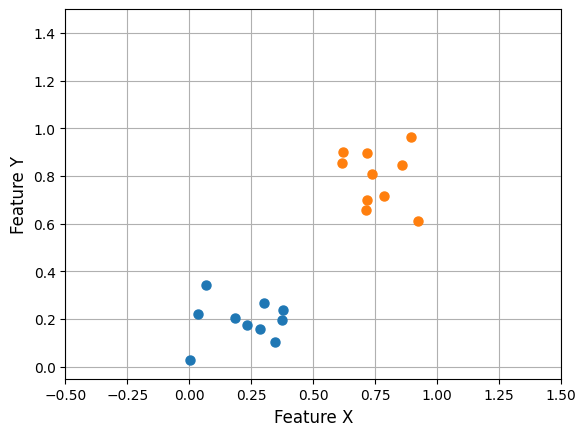

In [100]:
plt.plot(
    X[Y == 0, 0],
    X[Y == 0, 1],
    marker=".",
    markersize=13,
    linestyle="",
    label="Class 0",
)
plt.plot(
    X[Y == 1, 0],
    X[Y == 1, 1],
    marker=".",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.xlim([-0.5, 1.5])
plt.ylim([-.05, 1.5])

plt.xlabel("Feature X", fontsize=12)
plt.ylabel("Feature Y", fontsize=12)

plt.grid()
plt.show()

In [95]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        z = self.bias
        
        for i in range(len(self.weights)):
            z += x[i]*self.weights[i]

        if z>0.0:
            pred = 1
        else:
            pred = 0
            
        return pred

    
    def update(self, x, y):
        pred = self.forward(x)
        err = y - pred

        self.bias += err
        for i in range(len(self.weights)):
            self.weights[i] += err*x[i]

        return err

In [96]:
def check():
    p = Perceptron(3)
    for epoch in range(5):
        accuracy = 0 
        predictions = np.zeros(40)
        
        for i in range(len(X)):
            predictions[i] = p.update(X[i],Y[i])
            accuracy = sum(predictions==0)/len(predictions)
        print("epoch ",epoch)
        print(accuracy)

In [97]:
def format_time_in_ms(stats):
    for func, (cc, nc, tt, ct, callers) in stats.stats.items():
        stats.stats[func] = (cc, nc, tt * 1000, ct * 1000, callers)

profiler = cProfile.Profile()
profiler.enable()

check()

profiler.disable()

# Format output
stats = pstats.Stats(profiler)
format_time_in_ms(stats)  # Convert time to milliseconds
stats.print_stats()

epoch  0
0.975
epoch  1
0.975
epoch  2
1.0
epoch  3
1.0
epoch  4
1.0
         1140 function calls (1137 primitive calls) in 0.003 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.003    0.003    0.006    0.006 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\enum.py:1551(__or__)
        3    0.009    0.003    0.025    0.008 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\enum.py:1562(__and__)
        2    0.005    0.002    0.006    0.003 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:104(__init__)
        1    0.004    0.004    0.006    0.006 C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\threading.py:1155(_wait_for_tstate_lock)
       12    0.011    0.001    0.014    0.001 C:\Progra